# Embed RNASeq data into two dimensions

Data are from [GDC TCGA Acute Myeloid Leukemia (LAML)](https://xenabrowser.net/datapages/?cohort=GDC%20TCGA%20Acute%20Myeloid%20Leukemia%20(LAML)&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443).

In [1]:
!wget -q -nc https://gdc-hub.s3.us-east-1.amazonaws.com/download/TCGA-LAML.htseq_counts.tsv.gz

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.manifold

In [3]:
df = pd.read_csv("TCGA-LAML.htseq_counts.tsv.gz", delimiter="\t")
df.head()

,Ensembl_ID,TCGA-AB-2949-03B,TCGA-AB-2918-03A,TCGA-AB-2943-03A,TCGA-AB-2851-03A,TCGA-AB-2822-03A,TCGA-AB-2939-03A,TCGA-AB-2931-03A,TCGA-AB-2921-03A,TCGA-AB-2937-03A,...,TCGA-AB-2862-03A,TCGA-AB-2980-03A,TCGA-AB-2965-03A,TCGA-AB-2835-03A,TCGA-AB-2885-03A,TCGA-AB-2936-03A,TCGA-AB-2880-03A,TCGA-AB-2932-03A,TCGA-AB-2925-03A,TCGA-AB-2940-03A
0,ENSG00000000003.13,5.129283,3.700440,5.209453,2.000000,3.906891,2.321928,3.807355,1.000000,0.000000,...,1.584963,5.491853,4.459432,2.584963,7.044394,3.321928,1.584963,3.321928,3.000000,3.000000
1,ENSG00000000005.5,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.584963,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
2,ENSG00000000419.11,9.972980,9.885696,9.868823,9.301496,9.643856,9.364135,9.896332,10.386940,8.771489,...,8.957102,10.340963,10.161132,9.823367,8.968667,9.308339,9.149747,9.426265,9.643856,9.442943
3,ENSG00000000457.12,9.980140,10.052568,10.965784,9.463524,10.231221,9.978710,10.293472,10.163650,8.573647,...,8.936638,9.672425,9.741467,8.965784,9.726218,10.318543,9.405141,9.417853,9.489848,9.733015
4,ENSG00000000460.15,9.517669,9.823367,10.388017,8.317413,9.392317,9.554589,9.154818,8.857981,8.754888,...,8.434628,9.946906,9.544964,9.264443,9.768184,9.874981,9.548822,9.207014,9.273796,9.607330


In [4]:
expression = df.iloc[:, 1:].to_numpy()

In [5]:
tsne = sklearn.manifold.TSNE(
    n_components=2,
    metric="euclidean",
    init="pca",
    learning_rate="auto",
    n_jobs=6,
    random_state=42,
)


In [6]:
expression_embedded = tsne.fit_transform(expression)

/tmp/bmi511/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [12]:
expression_embedded.shape

(60488, 2)

Text(0.5, 1.0, 't-SNE embedding of RNASeq counts (TCGA-LAML)')

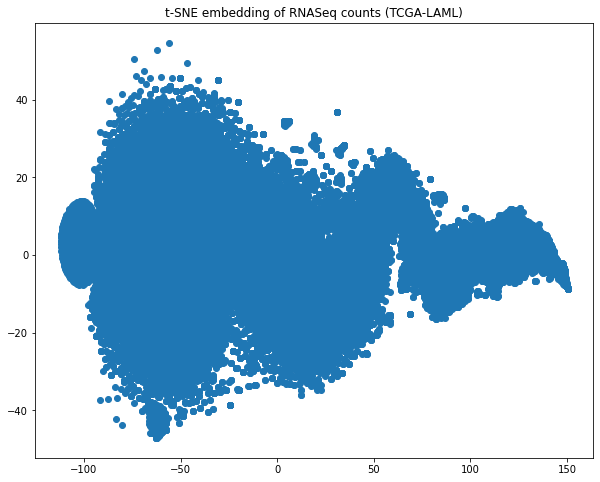

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x=expression_embedded[:, 0], y=expression_embedded[:, 1])
ax.set_title("t-SNE embedding of RNASeq counts (TCGA-LAML)")